In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from numpy.linalg import norm


In [86]:
class KMeans:
    
    def __init__(self,k=5,max_iter=1000):
        self.K=k
        self.max_iter=max_iter
        
    def initializeCentroids(self,X):
        n_samples,n_feats=X.shape
        np.random.seed(42)
        idx=np.random.permutation(n_samples)
        return X[idx[:self.K]]
    
    def calculate_distance(self,X,centroids):
        n_samples,n_feats=X.shape
        distances=np.zeros((n_samples,self.K))
        for i in range(self.K):
            dist=norm(X-centroids[i,:],axis=1)
            distances[:,i] =np.square(dist)
        return distances
    
    def updatingCentroid(self,X,labels):
        n_samples,n_feats=X.shape
        centroids=np.zeros((self.K,n_feats))
        for i in range(self.K):
            centroids[i,:]=np.mean(X[labels == i, :], axis=0)
        return centroids
    
    def find_nearest_cluster(self,distance):
        return np.argmin(distance,axis=1)
    
    def predict(self,X):
        self.centroids = self.initializeCentroids(X)
        for i in range(self.max_iter):
            centroids = self.centroids
            distances = self.calculate_distance(X, centroids)
            self.labels = self.find_nearest_cluster(distances)
            self.centroids = self.updatingCentroid(X, self.labels)
            if np.all(centroids == self.centroids):
                break
        distances = self.calculate_distance(X, self.centroids)
        return self.find_nearest_cluster(distances)
            
        


In [87]:
df = pd.read_csv("Data.csv")
X = df.values
X_std = ( X - X.mean(axis=0))/ X.std(axis=0)


In [135]:
kmean = KMeans(2)
kmean.predict(X_std)
centroids = kmean.centroids

#### Plot K-Means

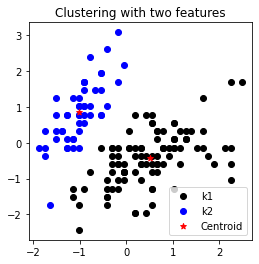

In [136]:
fig, ax = plt.subplots(figsize=(4,4))
plt.title('Clustering with two features')
plt.scatter(X_std[kmean.labels == 0, 0], X_std[kmean.labels == 0, 1], c='k', label='k1')
plt.scatter(X_std[kmean.labels == 1, 0], X_std[kmean.labels == 1, 1], c='b', label='k2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', label='Centroid')
plt.legend(loc='lower right')
plt.show()

### Dimensionality Reduction with PCA

In [126]:
def PCA(X,k=2):
    
    x_std = ( X - X.mean(axis=0))/ X.std(axis=0)
    cov = np.cov(x_std.T)
    vector = np.linalg.eig(cov)[1]
    return x_std @ vector[:,:k]

In [127]:
dim_reduction = PCA(X)

In [128]:
dim_reduction

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

In [129]:
PCA_with_kmean = KMeans(k=2)
PCA_with_kmean.predict(dim_reduction)
pca_centroids = PCA_with_kmean.centroids

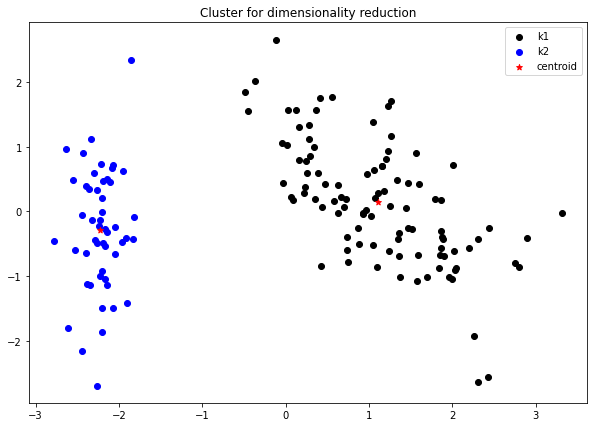

In [138]:
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Cluster for dimensionality reduction')
plt.scatter(dim_reduction[PCA_with_kmean.labels == 0, 0], 
            dim_reduction[PCA_with_kmean.labels == 0, 1],
            c='k', label='k1')
plt.scatter(dim_reduction[PCA_with_kmean.labels == 1, 0],
            dim_reduction[PCA_with_kmean.labels == 1, 1],
            c='b', label='k2')
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], marker='*',
            c='red', label='centroid')

plt.legend(loc='upper right')
plt.show()